In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
#import the libraries
import numpy as np
import pandas as pd
import os
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sripa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sripa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
input_data = pd.read_csv('Tweets.csv')

In [7]:
input_data.head()

,label,tweet
0,positive,@VirginAmerica nervous about my flight from DC...
1,positive,@VirginAmerica cool picture of another VirginA...
2,positive,@VirginAmerica Keep up the great work :)
3,positive,@VirginAmerica my goodness your people @love f...
4,positive,@VirginAmerica Thanks for a great flight from ...


In [8]:
input_data = input_data[['label', 'tweet']]

In [9]:
input_data.shape

(14438, 2)

In [10]:
label_dist = input_data['label'].value_counts().to_dict()

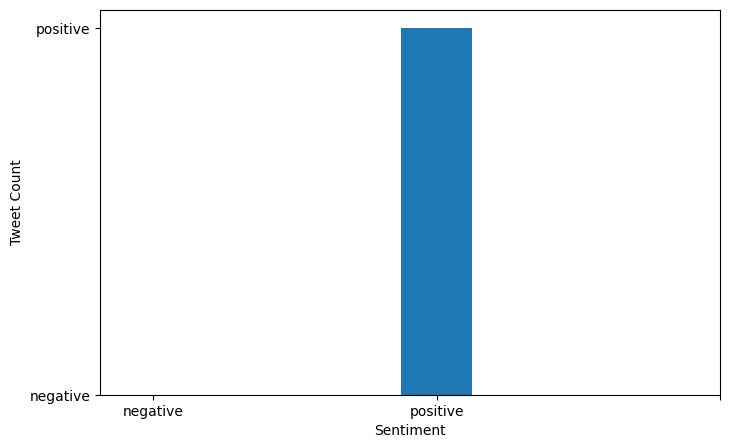

In [11]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(label_dist.keys(), label_dist.keys(), width = 0.25)
plt.xticks([0,1,2])
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

In [12]:
len(input_data['tweet'])-len(input_data['tweet'].drop_duplicates())

212

In [13]:
input_data=input_data.drop_duplicates(subset='tweet', keep="last")

In [14]:
input_data['length']=input_data['tweet'].apply(lambda x: len(x.split(' ')))

In [15]:
input_data.sample(10)

,label,tweet,length
3566,negative,"@united Thanks, but not so much the missing ba...",24
5440,positive,@SouthwestAir's CEO Kelly draws record crowd t...,13
4429,positive,@SouthwestAir really easy for locals to get do...,12
13543,negative,@AmericanAir We have been sitting on this bird...,26
4858,negative,@SouthwestAir I'm running out of money to keep...,23
8456,negative,@JetBlue and the 20min line I stood in to drop...,13
3558,negative,"@united, Thanks, but I didn't want to see 'we'...",25
6342,positive,@SouthwestAir you need this song for your next...,13
5953,positive,"@SouthwestAir snapchat, iMessage, instagram......",4
6028,positive,@SouthwestAir so when do we find out who won t...,13


In [16]:
print(round(input_data[input_data['label']=='negative']['length'].mean()))
print(round(input_data[input_data['label']=='positive']['length'].mean()))

20
14


<Axes: ylabel='Frequency'>

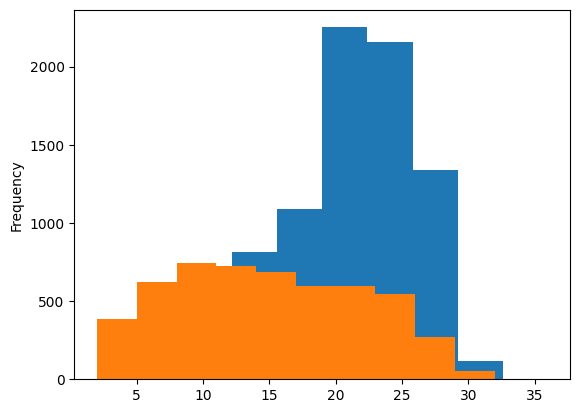

In [17]:
input_data[input_data['label']=='negative']['length'].plot.hist(bins=10)
input_data[input_data['label']=='positive']['length'].plot.hist(bins=10)

In [18]:
input_data["tweet_new"]=input_data["tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [19]:
def text_clean(tweet):
    #lowercase the tweet
    tweet=tweet.lower()
    #remove punctuation 
    tweet = re.sub('[()!?]', ' ', tweet)
    tweet = re.sub('\[.*?\]',' ', tweet)
    #remove non alphanumeric occurences
    tweet = re.sub("[^a-z0-9]"," ", tweet)
    #remove the @mention
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
    #remove the hastags
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)
    #remove any links 
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www.\S+", "", tweet)
    return tweet

<>:6: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\['
C:\Users\sripa\AppData\Local\Temp\ipykernel_161656\1092868546.py:6: SyntaxWarning: invalid escape sequence '\['
  tweet = re.sub('\[.*?\]',' ', tweet)


In [20]:
#apply the function on the tweet column 
input_data['clean_tweet'] = input_data['tweet_new'].apply(text_clean)

In [21]:
input_data[['tweet','clean_tweet']].sample(10)

,tweet,clean_tweet
1623,@united Then you delete my return ticket to Eu...,united then delete return ticket europe blame...
11651,@USAirways no we haven't because we've been in...,usairways line service desk 1hr 1 2 spot
7999,@JetBlue flight 2302 from JFK to BUF.,jetblue flight 2302 jfk buf
11095,@USAirways on Sunday! Can't wait! See you then,usairways sunday can t wait see
5362,@SouthwestAir any spare tickets for Vegas? Wou...,southwestair spare tickets vegas would forev...
433,@united Fingers crossed &amp; its all intact. ...,united fingers crossed amp intact very dis...
5864,@SouthwestAir are passengers automatically reb...,southwestair passengers automatically rebooke...
3199,"@united I was abused , threatened and forced t...",united i abused threatened forced travel lo...
1440,@united I am UA elite Gold and have a UA Chase...,united i ua elite gold ua chase pres plus cr...
10833,@USAirways No hot food on a 5 hour flight? Cra...,usairways no hot food 5 hour flight crazy c...


In [22]:
input_data['new_length']=input_data['clean_tweet'].apply(lambda x: len(x.split(" ")))

In [23]:
print(round(input_data[input_data['label']=='negative']['new_length'].mean()))
print(round(input_data[input_data['label']=='positive']['new_length'].mean()))

18
15


<Axes: ylabel='Frequency'>

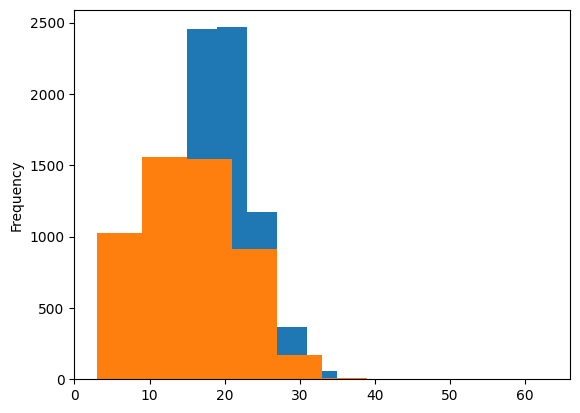

In [24]:
input_data[input_data['label']=='negative']['new_length'].plot.hist(bins=10)
input_data[input_data['label']=='positive']['new_length'].plot.hist(bins=10)

In [32]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.


In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sripa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
words = tokenizer.tokenize(input_data['clean_tweet'].str.cat(sep=' '))
dropwords=['to','i','the','a','you','for','on','and','t','is','in','it','of','me','my','that','can','have','not','s',
          'co','http','are','was','with','at','your','this','we','be','2','get','from','an','do','so','up','m']
filter_words = [word for word in words if word not in dropwords]

In [37]:
word_freq = nltk.FreqDist(filter_words)
wordfreq_df = pd.DataFrame(word_freq.most_common(top_words), columns = ['Word', 'Frequency'])

In [39]:
print(wordfreq_df)

            Word  Frequency
0         united       4146
1         flight       3829
2      usairways       3038
3    americanair       2798
4   southwestair       2447
5        jetblue       2382
6         thanks       1035
7      cancelled       1031
8        service        948
9           help        856
10          time        773
11      customer        741
12           amp        667
13         hours        664
14            us        662
15          hold        636
16         plane        630
17       flights        630
18         still        576
19         thank        571


In [41]:
X_train, X_test, y_train, y_test = train_test_split(input_data["clean_tweet"], input_data['label'], test_size = 0.3, stratify = input_data['label'])

In [45]:
X_train.shape

(9958,)

In [46]:
X_test.shape

(4268,)

In [48]:
y_train.value_counts()

label
negative    6301
positive    3657
Name: count, dtype: int64

In [49]:
X_train.value_counts()

clean_tweet
southwestair thank you                                                                             5
americanair thanks                                                                                 3
united thank you                                                                                   3
united thanks                                                                                      3
southwestair thanks                                                                                3
                                                                                                  ..
united trying get customer service agent  just landed sfo  can t fly 3 layovers 3 kids             1
usairways can t get back lost time                                                                 1
virginamerica can give silver status 12 months                                                     1
united customer service providence airport horrible  do actually care customers

In [50]:
y_test.value_counts()

label
negative    2701
positive    1567
Name: count, dtype: int64

In [54]:
y_test.head()

13150    positive
5991     positive
1281     negative
12316    positive
13108    negative
Name: label, dtype: object

In [52]:
vectorizer = CountVectorizer(token_pattern = r'\b\w+\b')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [57]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

LogisticRegression()

In [59]:
print(confusion_matrix(lr.predict(X_test_vec), y_test))

[[2332  406]
 [ 369 1161]]


In [60]:
print(classification_report(lr.predict(X_test_vec), y_test))

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86      2738
    positive       0.74      0.76      0.75      1530

    accuracy                           0.82      4268
   macro avg       0.80      0.81      0.80      4268
weighted avg       0.82      0.82      0.82      4268



In [61]:
#train and evaluate the multinominal Naive Baysian Classifier model 
MNB = MultinomialNB()
MNB.fit(X_train_vec,y_train)
print(confusion_matrix(MNB.predict(X_test_vec),y_test))
print(classification_report(MNB.predict(X_test_vec),y_test))

[[2484  632]
 [ 217  935]]
              precision    recall  f1-score   support

    negative       0.92      0.80      0.85      3116
    positive       0.60      0.81      0.69      1152

    accuracy                           0.80      4268
   macro avg       0.76      0.80      0.77      4268
weighted avg       0.83      0.80      0.81      4268



In [63]:
#train and evaluate the RF classifier model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_vec,y_train)
print(confusion_matrix(rf.predict(X_test_vec),y_test))
print(classification_report(rf.predict(X_test_vec),y_test))


[[2381  531]
 [ 320 1036]]
              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      2912
    positive       0.66      0.76      0.71      1356

    accuracy                           0.80      4268
   macro avg       0.77      0.79      0.78      4268
weighted avg       0.81      0.80      0.80      4268



In [64]:
# Use TF-IDF and train logistic regression
vectorizertfidf = TfidfVectorizer(use_idf=True)
X_train_tfvec = vectorizertfidf.fit_transform(X_train)
X_test_tfvec = vectorizertfidf.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_tfvec,y_train)
#evaluate the performance of logistic model on test data 
print(confusion_matrix(lr.predict(X_test_tfvec),y_test))
print(classification_report(lr.predict(X_test_tfvec),y_test))

[[2457  537]
 [ 244 1030]]
              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      2994
    positive       0.66      0.81      0.73      1274

    accuracy                           0.82      4268
   macro avg       0.78      0.81      0.79      4268
weighted avg       0.83      0.82      0.82      4268



In [65]:
#train and evaluate the RF classifier model
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train_tfvec,y_train)
print(confusion_matrix(rf.predict(X_test_tfvec),y_test))
print(classification_report(rf.predict(X_test_tfvec),y_test))

[[2432  579]
 [ 269  988]]
              precision    recall  f1-score   support

    negative       0.90      0.81      0.85      3011
    positive       0.63      0.79      0.70      1257

    accuracy                           0.80      4268
   macro avg       0.77      0.80      0.78      4268
weighted avg       0.82      0.80      0.81      4268



In [66]:
#train and evaluate the multinominal Naive Baysian Classifier model 
MNB =  MultinomialNB()
MNB.fit(X_train_tfvec,y_train)
print(confusion_matrix(MNB.predict(X_test_tfvec),y_test))
print(classification_report(MNB.predict(X_test_tfvec),y_test))

[[2639  935]
 [  62  632]]
              precision    recall  f1-score   support

    negative       0.98      0.74      0.84      3574
    positive       0.40      0.91      0.56       694

    accuracy                           0.77      4268
   macro avg       0.69      0.82      0.70      4268
weighted avg       0.88      0.77      0.80      4268



In [67]:
#train and evaluate the Linear Support Vector Classifier model 
SVC = LinearSVC()
SVC.fit(X_train_tfvec,y_train)
print(confusion_matrix(SVC.predict(X_test_tfvec),y_test))
print(classification_report(SVC.predict(X_test_tfvec),y_test))

[[2359  429]
 [ 342 1138]]
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      2788
    positive       0.73      0.77      0.75      1480

    accuracy                           0.82      4268
   macro avg       0.80      0.81      0.80      4268
weighted avg       0.82      0.82      0.82      4268



In [69]:
#load the test data
test_df=pd.read_csv('test_tweets.csv')

In [70]:
#validate the size of the test data 
test_df.shape

(202, 2)

In [72]:
#remove the stopwords from the test data 
test_df["tweet"]=test_df["tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [73]:
#convert the test tweet data into tfidf vector using pre-trained vectorisor
test_vec = vectorizertfidf.transform(test_df['tweet'])

In [74]:
#make the predictions on the test data using trained logistic regression model 
predictions=lr.predict(test_vec)

In [75]:
#check for the performance of the model on test data 
print(confusion_matrix(predictions,test_df['label']))
print(classification_report(predictions,test_df['label']))

[[ 61  15]
 [ 23 103]]
              precision    recall  f1-score   support

    negative       0.73      0.80      0.76        76
    positive       0.87      0.82      0.84       126

    accuracy                           0.81       202
   macro avg       0.80      0.81      0.80       202
weighted avg       0.82      0.81      0.81       202



In [76]:
#add the model predictions to the test data 
test_df['predictions']=predictions
#validate the final test dataframe 
test_df.head()

,label,tweet,predictions
0,positive,@VirginAmerica What @dhepburn said.,positive
1,positive,@VirginAmerica plus added commercials experien...,positive
2,positive,@VirginAmerica I today... Must mean I need tak...,positive
3,negative,@VirginAmerica really aggressive blast obnoxio...,negative
4,negative,@VirginAmerica really big bad thing,positive


In [77]:
#export the final submission file consisting model prediction on test data 
test_df.to_csv('final_prediction.csv')